In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [5]:
from datetime import datetime

In [3]:
import seaborn as sns

In [6]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [7]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.


<BarContainer object of 10 artists>

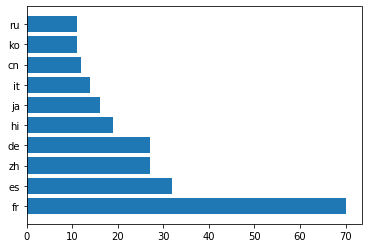

In [8]:
#график 1 - топ-10 самых популярных языков фильмов, кроме английского. 
#участвуют текстовое поле с указанием языка и числовое значение подсчета числа фильмов
#Столбчатая диаграмма позволяет наглядно увидеть как список популярных языков, так и распределение количества
top_languages = ( movies[ movies['original_language'] != 'en' ].groupby('original_language')
                   .count()[['budget']].sort_values(by='budget', ascending = False).reset_index().head(10) )
plt.barh(top_languages['original_language'], top_languages['budget'])

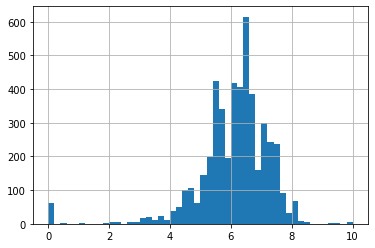

In [9]:
#график 2 - распределение оценок фильмам.
#на графике отражены средние оценки фильмов, float
#Позволяет увидеть распределение. Большинство фильмов оцениваются в пределах 5-7 баллов
movies.vote_average.hist(bins=50)

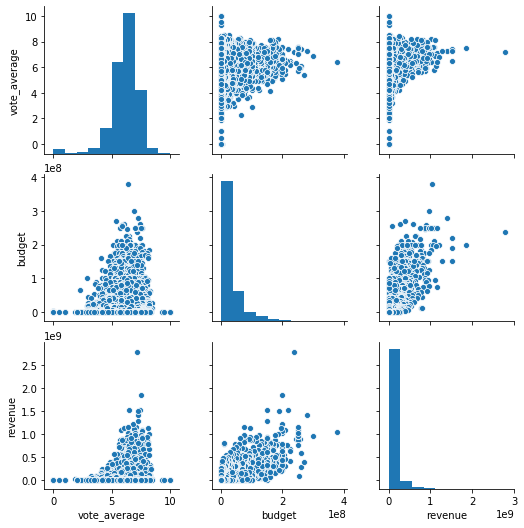

In [10]:
#график 3 - взаимосвязь разных метрик
#соотношение бюджета (инвестиций), оценок и выручки. Наглядно видно, что есть предельный "полезный" размер бюджета,
#генерирующий выручку, за котором инвестиции теряют свой ROI. Выручка и оценки хорошо коррелируют - 
#зритель голосует не только на сайте, но и "рублем"
sns_plot = sns.pairplot(
    movies[['vote_average', 'budget', 'revenue']])
sns_plot

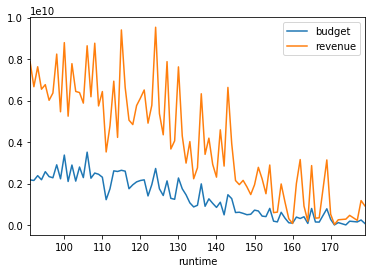

In [11]:
#график 4. 
#На одном графике две линии - budget и revenue, по оси x - длительность фильмов. 
#Взяты фильмы с бюджетом и выручкой более 1 млн и длительностью от полутора часов до трех
#Посмотрим, любят ли люди длинные фильмы (спойлер - нет) и зависит ли бюджет от длительности
#На графике наглядно видно. что длительность не является определяющим фактором бюджета. 
#Также видно, что с определенной длительности (2,5 часа) выручка резко снижается
economics = movies[['budget', 'revenue', 'runtime']]
economics_ = economics[ ( economics['budget'] > 1000000 ) & ( economics['revenue'] > 1000000 ) & ( economics['runtime'] > 90 ) & ( economics['runtime'] < 180 ) ]
runtime_efficiency = economics_.groupby(economics_['runtime']).sum().sort_values(by = 'runtime', ascending = True)
runtime_efficiency.plot()

In [12]:
#график 5
#построим heatmap - средние оценки фильмов в зависимости от языка оригинала и года выпуска (его определим из даты релиза)
#возьмем только популярные языки - из графика 1 + английский
#кроме того, возьмем только последние 2 тысячи фильмов с бюджетом и выручкой более 100к
# по heatmap наглядно видно, что фильмы на английском всегда нравятся зрителям, но лучшие фильмы снимались в Азии в начале 2000-х

lang_list = top_languages['original_language'].tolist()
lang_list.append('en')

all_data = movies[['release_date', 'budget', 'revenue', 'original_language', 'vote_average']]
data = all_data[ (all_data['budget'] > 100000 ) & ( all_data['revenue'] > 100000) & (all_data['original_language'].isin(lang_list)) ].sort_values(by='release_date', ascending = False).head(2000)
data.tail()

,release_date,budget,revenue,original_language,vote_average
493,2001-12-11,60000000,313542341,en,7.7
264,2001-12-11,107000000,87713825,en,6.7
575,2001-12-10,68000000,203388341,en,6.5
2544,2001-12-07,16000000,66468332,en,5.5
388,2001-12-07,85000000,450717150,en,7.2


In [13]:
def year_(a):
    year = a[0:4]
    return year

In [14]:
data['year'] = data['release_date'].apply(year_)

year_lang = data.pivot_table(
                        index='original_language', 
                        columns='year', 
                        values='vote_average', 
                        aggfunc='mean').fillna(0).applymap(float)

year_lang

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
original_language,,,,,,,,,,,,,,,,
cn,0.000000,0.000000,0.000000,7.2000,0.000000,0.000000,0.000000,0.000000,6.500000,0.000000,0.000000,0.000000,0.00000,0.000000,6.500000,0.000000
de,0.000000,0.000000,7.400000,7.7000,0.000000,7.900000,0.000000,7.500000,7.100000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
en,6.772727,6.154331,6.130693,6.1952,6.181752,6.185034,6.334783,6.145113,6.214184,6.174667,6.139355,6.196875,6.33913,6.377863,6.323684,6.098551
es,0.000000,7.100000,0.000000,7.2000,0.000000,6.575000,7.050000,0.000000,7.100000,0.000000,0.000000,0.000000,6.75000,0.000000,0.000000,0.000000
fr,7.000000,7.000000,7.000000,6.5000,6.733333,6.666667,7.400000,5.900000,6.800000,7.175000,0.000000,7.550000,0.00000,5.800000,0.000000,0.000000
hi,0.000000,0.000000,0.000000,7.4000,0.000000,6.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.25000,0.000000,0.000000,7.300000
it,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.30000,0.000000,0.000000,0.000000
ja,0.000000,0.000000,0.000000,8.2000,0.000000,0.000000,0.000000,7.500000,0.000000,6.300000,0.000000,0.000000,6.50000,0.000000,0.000000,6.500000
ko,0.000000,0.000000,8.000000,0.0000,0.000000,6.700000,4.000000,0.000000,6.500000,0.000000,0.000000,0.000000,6.70000,0.000000,0.000000,0.000000


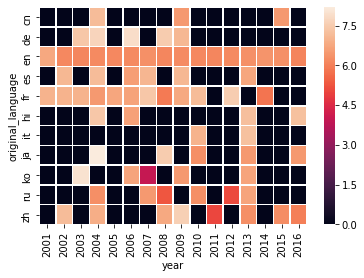

In [15]:
sns.heatmap(year_lang, linewidths=0.5)